In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torch.nn.functional as F

In [ ]:
seed = 42
torch.manual_seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
batch_size = 512
epochs = 22
learning_rate = 0.001

In [ ]:
df = pd.read_excel('/content/Dry_Bean_Dataset.xlsx')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [ ]:
y

0           SEKER
1           SEKER
2           SEKER
3           SEKER
4           SEKER
           ...   
13606    DERMASON
13607    DERMASON
13608    DERMASON
13609    DERMASON
13610    DERMASON
Name: Class, Length: 13611, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
X = StandardScaler().fit_transform(X)
print(X)

[[-0.84074853 -1.1433189  -1.30659814 ...  2.40217287  1.92572347
   0.83837103]
 [-0.82918764 -1.01392388 -1.39591111 ...  3.10089314  2.68970162
   0.77113842]
 [-0.80715717 -1.07882906 -1.25235661 ...  2.23509147  1.84135576
   0.91675514]
 ...
 [-0.37203825 -0.44783294 -0.45047814 ...  0.28920441  0.33632829
   0.39025114]
 [-0.37176543 -0.42702856 -0.42897404 ...  0.22837538  0.2489734
   0.03644001]
 [-0.37135619 -0.38755718 -0.2917356  ... -0.12777587 -0.2764814
   0.71371948]]


In [ ]:
y = LabelEncoder().fit_transform(y)
y

array([5, 5, 5, ..., 3, 3, 3])

In [ ]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
X_train, X_test , y_train,  y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

In [ ]:
print("Train size:", X_train.shape)
print("Validation size :", X_val.shape)
print("Test size: ", X_test.shape)

Train size: (10412, 16)
Validation size : (1157, 16)
Test size:  (2042, 16)


In [ ]:
class PyTorchMLP (torch.nn.Module):
  def __init__(self, num_features, num_classes):
    super().__init__()

    self.mlp = torch.nn.Sequential(
      # 1st hidden layer
      torch.nn.Linear(num_features, 25),
      torch.nn.ReLU(),

      #2nd hidden layer
      torch.nn.Linear(25, 15),
      torch.nn.ReLU(),

      #3rd hidden layer
      torch.nn.Linear(15, 20),
      torch.nn.ReLU(),

      # output layer
      torch.nn.Linear(20, num_classes),
      )

  def forward(self,x):
    logits = self.mlp(x)
    return logits

In [ ]:
from torch.utils.data import Dataset, DataLoader

In [ ]:
class MyDataset(Dataset):
  def __init__(self, x, y):
    self.features = torch.tensor(x, dtype=torch. float32)
    self.labels = torch.tensor(y, dtype=torch.int64)

  def __getitem__(self, index):
    x = self.features[index]
    y = self.labels[index]
    return x, y

  def __len__(self):
    return self.labels.shape[0]

In [ ]:
train_ds = MyDataset(X_train, y_train)
val_ds = MyDataset(X_val, y_val)
test_ds = MyDataset(X_test, y_test)

test_loader = DataLoader(
  dataset=test_ds,
  batch_size=32,
  shuffle=False,
)
val_loader = DataLoader(
  dataset=val_ds,
  batch_size=32,
  shuffle=False,
)
train_loader = DataLoader(
  dataset=train_ds,
  batch_size=32,
  shuffle=True,
)


In [ ]:
def compute_accuracy(model, dataloader):

  model = model.eval()

  correct = 0.0
  total_examples = 0

  for idx, (features, labels) in enumerate(dataloader):
    with torch.inference_mode():
      logits = model(features)
    predictions = torch.argmax(logits, dim=1)

    compare = labels == predictions
    correct += torch.sum(compare)
    total_examples += len(compare)

  return correct / total_examples

In [ ]:
losses = []
torch.manual_seed (1)
model = PyTorchMLP(num_features=16, num_classes=7)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

num_epochs = epochs

for epoch in range(num_epochs):
  model = model.train()
  for batch_idx, (features, labels) in enumerate(train_loader):
    logits = model(features)
    loss = F.cross_entropy(logits, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f"Epoch: {epoch+1:03d}/{num_epochs:03d}"
  f" | Batch: {batch_idx:03d}/{len(train_loader):03d}"
  f" | Training/Validation Loss: {loss:.2f}")

  losses.append(loss.item())

  train_acc = compute_accuracy(model, train_loader)
  val_acc = compute_accuracy(model, val_loader)
  print(f"Train Acc {train_acc*100:.2f}% | Val Acc {val_acc*100:.2f}%")

Epoch: 001/022 | Batch: 325/326 | Training/Validation Loss: 0.59
Train Acc 86.73% | Val Acc 87.81%
Epoch: 002/022 | Batch: 325/326 | Training/Validation Loss: 0.13
Train Acc 91.38% | Val Acc 91.70%
Epoch: 003/022 | Batch: 325/326 | Training/Validation Loss: 0.46
Train Acc 89.41% | Val Acc 88.16%
Epoch: 004/022 | Batch: 325/326 | Training/Validation Loss: 0.03
Train Acc 92.37% | Val Acc 92.05%
Epoch: 005/022 | Batch: 325/326 | Training/Validation Loss: 0.13
Train Acc 87.87% | Val Acc 86.52%
Epoch: 006/022 | Batch: 325/326 | Training/Validation Loss: 0.32
Train Acc 92.58% | Val Acc 93.43%
Epoch: 007/022 | Batch: 325/326 | Training/Validation Loss: 0.07
Train Acc 92.51% | Val Acc 92.39%
Epoch: 008/022 | Batch: 325/326 | Training/Validation Loss: 0.23
Train Acc 90.98% | Val Acc 90.92%
Epoch: 009/022 | Batch: 325/326 | Training/Validation Loss: 0.32
Train Acc 88.09% | Val Acc 87.64%
Epoch: 010/022 | Batch: 325/326 | Training/Validation Loss: 0.04
Train Acc 92.47% | Val Acc 92.74%
Epoch: 011

In [ ]:
epochs = list(range(1,epochs+1))

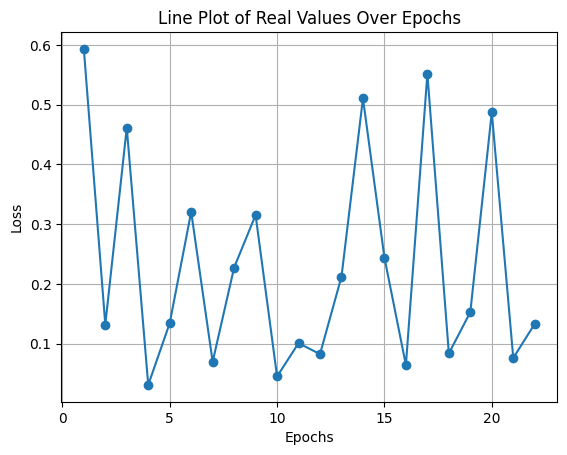

In [ ]:
plt.plot(epochs, losses, marker='o', linestyle='-')
plt.title('Line Plot of Real Values Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [ ]:
train_accuracy = compute_accuracy(model, train_loader)
val_accuracy = compute_accuracy(model, val_loader)
test_accuracy = compute_accuracy(model, test_loader)

print (f"Train Accuracy: {train_accuracy*100:.2f}%")
print (f"Val Accuracy: {val_accuracy*100: .2f}%")
print (f"Test Accuracy: {test_accuracy*100:.2f}%")

Train Accuracy: 92.62%
Val Accuracy:  91.44%
Test Accuracy: 91.92%
